**Exercise 6.4:** One variation of GoL, called "Highlife", has the same rules as GoL, plus one additional rule: a dead cell with 6 neighbors comes to life.

Write a class named "Highlife" that inherits from `Cell2D` and implements this version of the rules. Also, write a class named `HighlifeViewer` that inherits from `Cell2DViewer` and try different ways to visualize the results.

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]])
    table = np.zeros(20, dtype = np.uint8)
    table[[3, 12, 13]] = 1
    
    def step(self):
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]
        

In [11]:
class MyLife(Life):
    table = np.zeros(20, dtype = np.uint8)
    table[[3, 6, 12, 13]] = 1

The "replicator" has the following initial configuration:

In [12]:
replicator = [
    '00111',
    '01001',
    '10001',
    '10010',
    '11100'
]

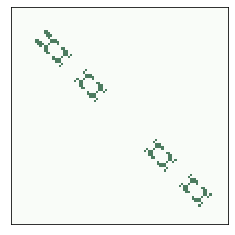

In [14]:
n = 100
life = MyLife(n)
life.add_cells(n//2, n//2, *replicator)
life.animate(1000)